# Introduction of the analysis and dataset

In this capstone, we'll do an analysis on World university ranking 2023 dataset by QS World University ranking wherein they feature the top 1400 university across the globe. 

Institutions were assessed across six categories(indicators) to effectively capture their performance. Base on QS World University Ranking, their main objective was to help students decide for their future. 

On the other hand, the analysis that we'll be making are the following: 

**HYPOTHESIS 1**

We'll be testing if there is any correlation between institutions with higher employer reputations score(ER Score) and graduate employment rate score (GER score)

**HYPOTHESIS 2**

We'll look into US institutions and compare it with the rest of the institution to see if there is a statistical difference between them in terms of their respective academic reputation score(AR Score)

**HYPOTHESIS 3**

We'll compare US institutions with other institutions to see if there is a statistical difference between them in terms of their graduate employment rate score(GER score)

In [ ]:
# Upload data into collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the libraries 

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Loading the dataset

In [ ]:
path = '/content/drive/MyDrive/Thinkful/Module 34 (Capstone III)/2023 QS World University Rankings.csv'
df = pd.read_csv(path)
df.head(5)

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


# Shape of the dataset

In [ ]:
# check the dimension of the dataset

df.shape

(1422, 21)

In [ ]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

As we can see, there are NA values in the ger score variable which we are going to use in correlation analysis. We'll drop those missing values using 'dropna()' and compare the size of the dataframe after.

In [ ]:
# Remove null values from the dateframe

print(df.size)
clean_df = df.dropna()
print(clean_df.size)

29862
27363


In [ ]:
# Check if there are any duplicate in the dataset

clean_df.duplicated().sum()

0

Were are able to remove missing values in the dataset and renamed it as 'clean_df'. We can also see that our around 2000 values were remove upon cleaning the dataset and found 0 duplicates in the records

In [ ]:
# Check the descriptives of the dataframe
clean_df.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,682.077513,21.296316,21.814198,30.540368,25.401305,31.992479,27.386032,50.938450,26.947199
std,405.089860,23.414417,24.608929,28.395954,28.068820,34.242130,31.288100,30.325513,26.437919
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,327.500000,5.800000,4.800000,8.400000,3.300000,4.850000,3.400000,23.200000,7.100000
50%,674.000000,11.700000,11.200000,18.700000,12.700000,14.300000,11.600000,51.700000,16.400000
75%,1028.500000,25.900000,29.150000,44.950000,41.400000,55.950000,42.050000,79.100000,38.650000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
# Check number of records per location code
clean_df['location code'].value_counts()

US    194
UK     90
CN     58
JP     50
RU     48
     ... 
VE      1
KG      1
OM      1
CY      1
SY      1
Name: location code, Length: 94, dtype: int64

In [ ]:
clean_df.head(5)

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


# HYPOTHESIS 1

Ho: There is no statistical significant relationship between employer reputations score and graduate employment rate score

Ha: There is a statistical significant relationship between employer reputation score and graduate employment rate score

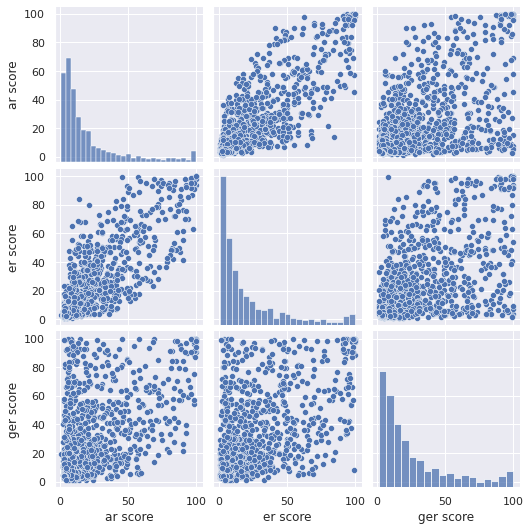

In [ ]:
# create a pairplot for employer reputation score and graduate employment rate score

sns.pairplot(clean_df, vars = ['ar score', 'er score', 'ger score'])

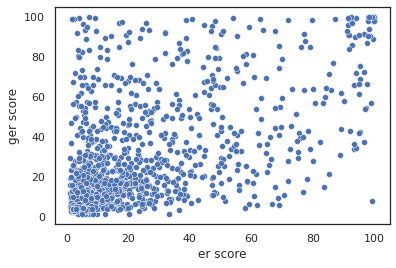

In [ ]:
sns.set_style('white')
sns.scatterplot(x = 'er score', y = 'ger score', data = clean_df)

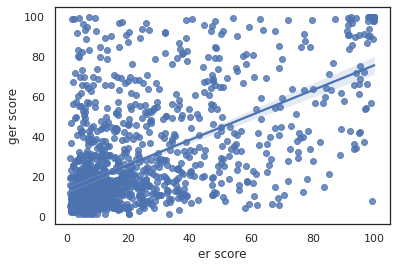

In [ ]:
sns.set_style('white')
sns.regplot(x="er score", y="ger score", data=clean_df);

# Run Correlation Analysis

In [ ]:
clean_df[['er score', 'ger score']].corr()

,er score,ger score
er score,1.00000,0.58045
ger score,0.58045,1.00000


To confirm the correlation analysis, we'll run pearson R test as well and see if the same result will be produced.

In [ ]:
# Test for statistical significance of correlations
stats.pearsonr(clean_df['er score'], clean_df['ger score'])

(0.5804499156857071, 3.221363283724653e-118)

Base on the correlation analysis that we conducted, there is a moderate positive correlation between employer reputation and graduate employment rate score, with a correlation size of 0.58 and a p-value < 0.05

Answering our hypothesis we can reject the null hypothesis(Ho) and accept the alternative hypothesis(Ha). Therefore, we can safely say that there is a moderate positive correlation between employer reputation score and graduate employment rate score.

# HYPOTHESIS 2

Null(Ho): There is no statistical difference between academic reputation score(AR Score) for US institutions compared to the rest of the institution outside of the US

Alternative(Ha): There is a statistical difference between academic reputation score for US institutions compared to the rest of the institution outside of the US

# Prepare the data for T-test

In [ ]:
# Divide the data into two, separating by location code for US institutions and the rest outside of the US

loc_code_us = clean_df.loc[clean_df['location code'] == 'US']
loc_code_other = clean_df.loc[clean_df['location code'] != 'US']

In [ ]:
# info check

loc_code_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 1397
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           194 non-null    int64  
 1   institution    194 non-null    object 
 2   location code  194 non-null    object 
 3   location       194 non-null    object 
 4   ar score       194 non-null    float64
 5   ar rank        194 non-null    object 
 6   er score       194 non-null    float64
 7   er rank        194 non-null    object 
 8   fsr score      194 non-null    float64
 9   fsr rank       194 non-null    object 
 10  cpf score      194 non-null    float64
 11  cpf rank       194 non-null    object 
 12  ifr score      194 non-null    float64
 13  ifr rank       194 non-null    object 
 14  isr score      194 non-null    float64
 15  isr rank       194 non-null    object 
 16  irn score      194 non-null    float64
 17  irn rank       194 non-null    object 
 18  ger score

# Academic Reputation score analysis of institutions in the US

In [ ]:
loc_code_us['ar score'].describe()

count    194.000000
mean      25.663402
std       29.797933
min        1.000000
25%        5.425000
50%       12.000000
75%       36.250000
max      100.000000
Name: ar score, dtype: float64

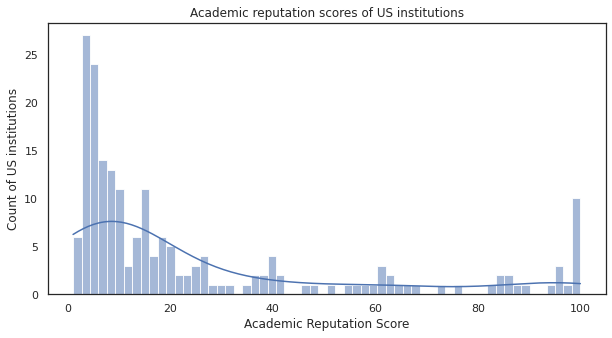

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(loc_code_us['ar score'], bins = 60, kde = True)
plt.xlabel('Academic Reputation Score')
plt.ylabel('Count of US institutions')
plt.title('Academic reputation scores of US institutions')
plt.show()

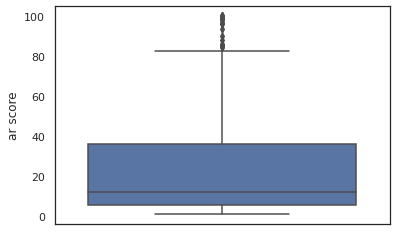

In [ ]:
#plt.figure(figsize=(10,5))
sns.boxplot(y = 'ar score', data = loc_code_us)

# Academic Reputation Score Analysis of other Institutions

In [ ]:
loc_code_other['ar score'].describe()

count    1109.000000
mean       20.532372
std        22.037194
min         2.100000
25%         6.000000
50%        11.700000
75%        25.000000
max       100.000000
Name: ar score, dtype: float64

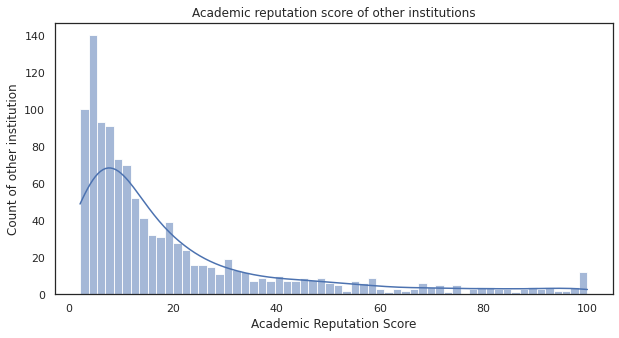

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(loc_code_other['ar score'], bins = 60, kde = True)
plt.xlabel('Academic Reputation Score')
plt.ylabel('Count of other institution')
plt.title('Academic reputation score of other institutions')
plt.show()

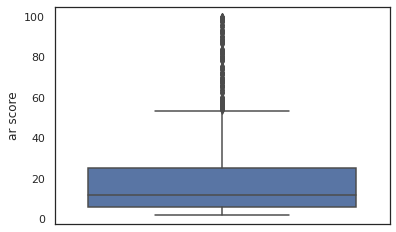

In [ ]:
#plt.figure(figsize=(10,5))
sns.boxplot(y = 'ar score', data = loc_code_other)

# Run Independent Sample T-Test

In [ ]:
stats.ttest_ind(loc_code_us['ar score'], loc_code_other['ar score'])

Ttest_indResult(statistic=2.8234189187692738, pvalue=0.004823857287643151)

The t-test result gives us a value of 0.005 which is lower than the required p-value of 0.05 and a difference between these two means of 2.83. 

Hence, we can reject our null hypothesis and accept our alternative hypothesis that there is a small statistical difference between US and other institution when measure between their respective academic reputation scores. 

# Set up values to calculate condifence interval

For us to further see the difference, we'll calculate the confidence interval to see how much difference is there between the two variables

In [ ]:
sample_1_n = loc_code_us.shape[0]
sample_2_n = loc_code_other.shape[0]
sample_1_mean = loc_code_us['ar score'].mean()
sample_2_mean = loc_code_other['ar score'].mean()
sample_1_var = loc_code_us['ar score'].var()
sample_2_var = loc_code_other['ar score'].var()

In [ ]:
import math

std_error_diff = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_diff = sample_1_mean - sample_2_mean

margin_of_error = 1.96 * std_error_diff

ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error

print('The difference in means with 95% confidence interval is between {} and {}' .format(ci_lower, ci_upper))

The difference in means with 95% confidence interval is between 0.7418570010252621 and 9.520204110963807


Using the confidence interval, we can quantify that the difference between US and other institution when measure by their respective academic reputations scores has a difference between 0.74 and 9.52. 

# HYPOTHESIS 3

Null(Ho): Null(Ho): There is no statistical difference between graduate employment rate score for US institutions compared to the rest of the institution outside of the US

Alternate(Ha): There is a statistical difference between graduate employment rate score for US institutions compared to the rest of the institution outside of the US

# Graduate Employment Rate Scores Analysis of US Institutions

In [ ]:
loc_code_us['ger score'].describe()

count    194.000000
mean      37.061856
std       29.977928
min        3.100000
25%       13.325000
50%       25.550000
75%       54.650000
max      100.000000
Name: ger score, dtype: float64

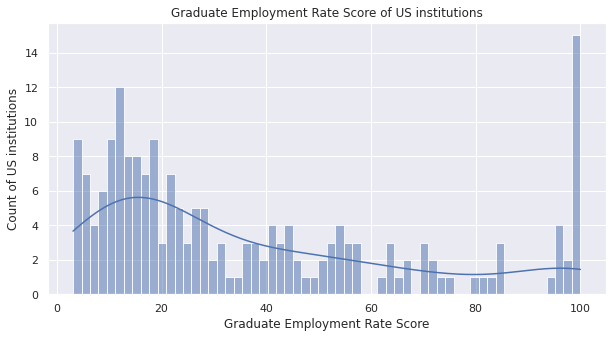

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(loc_code_us['ger score'], bins = 60, kde = True)
plt.xlabel('Graduate Employment Rate Score')
plt.ylabel('Count of US institutions')
plt.title('Graduate Employment Rate Score of US institutions')
plt.show()

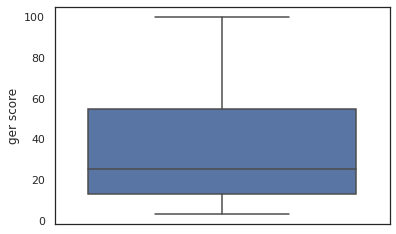

In [ ]:
#plt.figure(figsize=(10,5))
sns.boxplot(y = 'ger score', data = loc_code_us)

# Graduate Employment Rate Scores Analysis of Other Institutions

In [ ]:
loc_code_other['ger score'].describe()

count    1109.000000
mean       25.177818
std        25.372437
min         1.000000
25%         6.500000
50%        14.800000
75%        34.300000
max       100.000000
Name: ger score, dtype: float64

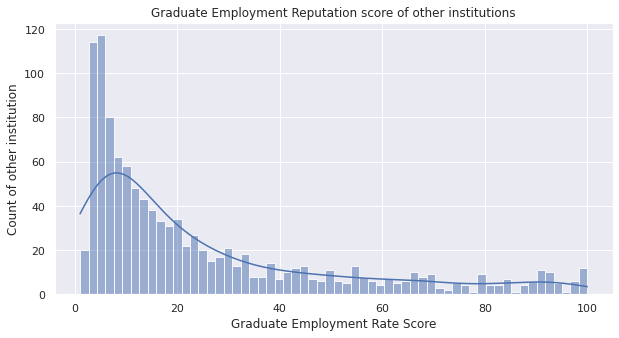

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(loc_code_other['ger score'], bins = 60, kde = True)
plt.xlabel('Graduate Employment Rate Score')
plt.ylabel('Count of other institution')
plt.title('Graduate Employment Reputation score of other institutions')
plt.show()

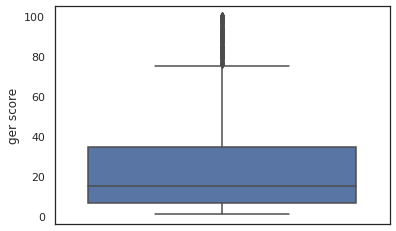

In [ ]:
#plt.figure(figsize=(10,5))
sns.boxplot(y = 'ger score', data = loc_code_other)

# Run Independent Sample T-Test

In [ ]:
stats.ttest_ind(loc_code_us['ger score'], loc_code_other['ger score'])

Ttest_indResult(statistic=5.849262485191687, pvalue=6.238691575403291e-09)

The T-test result gives us a significant value lower than the required p-value of 0.05 and a difference between these two means of 5.85. 

Hence, we can reject our null hypothesis and accept our alternative hypothesis that there is a statistical difference between US and other institution when measured between their graduate employment rate scores(GER score). 

# Set up values to calculate condifence interval

In [ ]:
sample_1_n = loc_code_us.shape[0]
sample_2_n = loc_code_other.shape[0]
sample_1_mean = loc_code_us['ger score'].mean()
sample_2_mean = loc_code_other['ger score'].mean()
sample_1_var = loc_code_us['ger score'].var()
sample_2_var = loc_code_other['ger score'].var()

In [ ]:
std_error_diff = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_diff = sample_1_mean - sample_2_mean

margin_of_error = 1.96 * std_error_diff

ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error

print('The difference in means with 95% confidence interval is between {} and {}' .format(ci_lower, ci_upper))

The difference in means with 95% confidence interval is between 7.409035996848849 and 16.35903963551244


Using the confidence interval, we can quantify that the difference between US and other institution when measured by their graduate employment rate scores has a difference between 7.41 and 16.36 

# CONCLUSION

We can therefore conclude base on our three hypotheses that, first, the relationship between employer reputation and graduate employment rate score has a moderate effect with each other. Second, in terms of respective academic reputation, institutions in the US and others has a significant difference. Third, in terms of graduate employment rate score, insitutions in the US and others also has a significant difference with one another.

# Recommendations

**For future students**

When choosing which educational institution to go to, they should consider its reputation both academically and how employers perceive a school. For this can help them choose a school that will benefit them upon looking for a job and the quality of education they get from these institutions.

**For the universities**

They can refer to this information as way to see how they can improve there level of education, competitiveness and building relations with employers or outside network. For all these factors can help not just the intitutions itself to be recognized but also the quality of students that they produce

**Data Source**

Kaggle: https://www.kaggle.com/datasets/jkanthony/world-university-rankings-202223

CSV File:https://drive.google.com/file/d/1AkrAa9hodcQYTkDuCHNZ92jNRLWS1cXF/view?usp=sharing